In [4]:
pip install sqlalchemy

In [5]:
!git clone https://github.com/lc3287/genie.git

Cloning into 'genie'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 19 (delta 3), reused 9 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (19/19), 564.76 KiB | 9.11 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [6]:
%cd genie/Genie_Dataset

/content/genie/Genie_Dataset


In [2]:
import pandas as pd
import numpy as np
import sqlite3
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

In [7]:
# Connect to the SQLite database
conn = sqlite3.connect('Genie_Dataset.db')

# Load a table into a DataFrame
dataset1 = pd.read_sql_query("SELECT * FROM GenieDataset1", conn)
dataset2 = pd.read_sql_query("SELECT * FROM GenieDataset2", conn)
dataset3 = pd.read_sql_query("SELECT * FROM GenieDataset3", conn)
dataset4 = pd.read_sql_query("SELECT * FROM GenieDataset4", conn)

# Close the connection
conn.close()

# Genie Dataset 1

In [21]:
dataset1

,DateSettled,AgrtNo.,RegNo.,AgrtDate,BlockNo,LoanAmt,TermCharges,TotalPayable,PrincipleAmt,Rebate,...,O/DInt,Postage,Misc,RepoExp,Storage,LegalExp,LOD,JPJExp,DealerID,LoanType
0,06-May-2024,A0000001,WRJ****,27/1/2022,None,"18,000.00","9,000.00","27,000.00","11,640.00","2,600.00",...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D0000001,CONVENTIONAL
1,05-Apr-2023,A0000002,WTU****,8/2/2022,None,"24,000.00","6,840.00","30,840.00","17,960.00","2,600.00",...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D0000002,CONVENTIONAL
2,17-May-2024,A0000003,WXT****,9/2/2022,None,"8,400.00","3,360.00","11,760.00","4,100.00",970.00,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D0000003,CONVENTIONAL
3,14-Mar-2024,A0000004,WVJ****,9/2/2022,None,"16,200.00","7,700.00","23,900.00","7,160.00","2,500.00",...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D0000004,CONVENTIONAL
4,13-Mar-2024,A0000005,WUF****,17/2/2022,None,"9,840.00","4,670.00","14,510.00","3,540.00","1,610.00",...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D0000005,CONVENTIONAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,14-Jun-2024,A0000273,JNP****,29/3/2024,None,"15,600.00","7,800.00","23,400.00","15,960.00","7,050.00",...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D0000153,CONVENTIONAL
273,11-Jul-2024,A0000274,WA6****,18/4/2024,None,"27,060.00","16,100.00","43,160.00","27,150.00","14,980.00",...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D0000154,CONVENTIONAL
274,30-Jul-2024,A0000275,WSF****,14/5/2024,None,"18,600.00","9,300.00","27,900.00","18,550.00","8,400.00",...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D0000039,CONVENTIONAL
275,11-Jun-2024,A0000276,WVB****,15/5/2024,None,"18,000.00","3,600.00","21,600.00","18,290.00","3,310.00",...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D0000145,CONVENTIONAL


In [22]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DateSettled   277 non-null    object 
 1   AgrtNo.       277 non-null    object 
 2   RegNo.        277 non-null    object 
 3   AgrtDate      277 non-null    object 
 4   BlockNo       0 non-null      object 
 5   LoanAmt       277 non-null    object 
 6   TermCharges   277 non-null    object 
 7   TotalPayable  277 non-null    object 
 8   PrincipleAmt  277 non-null    object 
 9   Rebate        277 non-null    object 
 10  GLBal         277 non-null    float64
 11  LastPdAmt     277 non-null    object 
 12  TotInstalPd   277 non-null    object 
 13  O/DInt        277 non-null    float64
 14  Postage       277 non-null    float64
 15  Misc          277 non-null    float64
 16  RepoExp       277 non-null    float64
 17  Storage       277 non-null    float64
 18  LegalExp      277 non-null    

In [23]:
# check missing values
null_counts = dataset1.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0]
columns_with_nulls

,0
BlockNo,277


In [24]:
#check duplicated data
dataset1.duplicated().sum()

0

In [25]:
#check zero vaule data
null_counts2 = (dataset1 == 0).sum()
columns_with_nulls2 = null_counts2[null_counts2 > 0]
columns_with_nulls2

,0
GLBal,277
Postage,276
Misc,277
RepoExp,277
Storage,277
LegalExp,277
LOD,277
JPJExp,277


# Genie Dataset 2

In [75]:
dataset2

,SubmissionDate,ApplicationNo.,PreparedDate,JudgeStatus,JudgeRemarks,PrepareRemarks,AgrtNo.,ApprovalDate,HirerNRIC,CarPlateNo.,...,AppealBy,DateAppeal,FirstApprovedDate(N),FirstApprovedBy(N),InsDate,FirstRejectDate,FirstRejectBy,LoanType,DealerID2,HYrsSvr
0,8/12/2021,APP0000001,24/2/2022,DISBURSED,Incomplete customer details. \r\n\r\napproved....,"APPLICANT IS OWN BUSINESS, OWNING 2 SOLE-PROPS...",A0000008,24/2/2022,77110808****,DEF****,...,YEAP,23/2/2022,None,None,None,None,None,CONVENTIONAL,D000001,0.0
1,10/12/2021,APP0000002,13/12/2021,CANCEL,APPLICANT WORKING AS A SUPERVISOR FOR 2 YEARS ...,DONE AMENDMENT.,None,30/12/2021,85101613****,QS6****,...,JINFEI,4/4/2022,None,None,None,None,None,CONVENTIONAL,D000001,2.0
2,13/12/2021,APP0000003,16/12/2021,CANCEL,REJECTE GTOR ARMY\r\n\r\nHIRER NOT PICK UP PHO...,REJECTE GTOR ARMY\r\n\r\nHIRER NOT PICK UP PHO...,None,16/12/2021,99021311****,ALA****,...,None,None,None,None,None,None,None,CONVENTIONAL,D000001,0.0
3,14/12/2021,APP0000004,20/12/2021,CANCEL,-PENDING ANOTHER 3 MTHS P/SLIP AND EPF OR BANK...,-PENDING ANOTHER 3 MTHS P/SLIP AND EPF OR BANK...,None,20/12/2021,98072814****,WA2****,...,None,None,None,None,None,None,None,CONVENTIONAL,D000001,0.0
4,14/12/2021,APP0000005,21/12/2021,CANCEL,PENDING BANK STATEMENT\r\nAPPLICANT REQUEST FO...,APPLICANT REQUEST FOR PROTON X70 MANUFACTURED ...,None,21/12/2021,90101109****,VDB****,...,None,None,None,None,None,None,None,CONVENTIONAL,D000001,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,25/2/2022,APP0000249,25/2/2022,DISBURSED,INCOME COMPUTE BASED ON INCOME TAX \r\nAPPROVE...,Using BE Form as income calculation\r\n\r\nApp...,A0000017,28/2/2022,84051814****,BLW****,...,None,None,None,None,None,None,None,CONVENTIONAL,D000129,2.0
249,28/2/2022,APP0000250,28/2/2022,CANCEL,cwa-done verified with applicant\r\n\r\nspgai ...,cwa-done verified with applicant\r\n\r\nspgai ...,None,None,86022833****,WWE****,...,None,None,None,None,None,None,None,CONVENTIONAL,D000026,13.0
250,28/2/2022,APP0000251,3/3/2022,CANCEL,Applicant is a technician at sgt ventures s/b ...,Applicant is a technician at sgt ventures s/b ...,None,3/3/2022,96031108****,NCQ****,...,AZLINA,3/3/2022,None,None,None,None,None,CONVENTIONAL,D000132,1.0
251,28/2/2022,APP0000252,28/2/2022,CANCEL,Rejected. FELDA with Trade reference.,cwa - Felda address match I/C.\r\n\r\ncwg - so...,None,28/2/2022,78020206****,PJU****,...,None,None,None,None,None,None,None,CONVENTIONAL,D000020,1.5


In [76]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 74 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SubmissionDate        253 non-null    object 
 1   ApplicationNo.        253 non-null    object 
 2   PreparedDate          243 non-null    object 
 3   JudgeStatus           253 non-null    object 
 4   JudgeRemarks          241 non-null    object 
 5   PrepareRemarks        246 non-null    object 
 6   AgrtNo.               16 non-null     object 
 7   ApprovalDate          216 non-null    object 
 8   HirerNRIC             253 non-null    object 
 9   CarPlateNo.           253 non-null    object 
 10  Make                  250 non-null    object 
 11  Model                 250 non-null    object 
 12  YearMade              253 non-null    int64  
 13  NetCashPrice          253 non-null    object 
 14  LaonAmt               253 non-null    object 
 15  MonthlyInstal         2

In [82]:
# check missing values
null_counts = dataset2.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0]
columns_with_nulls

,0
AgrtNo.,218
ApprovalDate,24
State,38
DisbursementDate,218
ApprovingOfficer,24
DisbursementOfficer,218
EmandateDateAppr,234
OccupationType,233
CCRIS,48
Marital,55


In [81]:
dataset2 = dataset2.dropna(subset=['PreparedDate', 'JudgeRemarks', 'PreparedDate','PrepareRemarks','Make','Model','ProcessingOfficer','MarketingOfficer','DealerState'])

In [78]:
#check duplicated data
dataset2.duplicated().sum()

0

In [83]:
#check zero vaule data
null_counts2 = (dataset2 == 0).sum()
columns_with_nulls2 = null_counts2[null_counts2 > 0]
columns_with_nulls2

,0
YearMade,10
IntRate,39
Tenor,39
MOF,39
Age,166
GNetSalary,196
TotalSalary,52
HirerBasicSalary,50
Age2,34
GrossSalary,41


# Genie Dataset 3

In [20]:
dataset3

,Branch,AgrtNo.,HirerIC,Age,State,Occupation,Marital,Race,Gender,TotalIncome,...,RAMCIHirer,RAMCIG1,RAMCIG2,RAMCIAverage,Status,Position,LoanType,No.InstalPaid,TotalInstalPd,field54
0,BCH01,A0000278,87121902****,34,SELANGOR,None,MARRIED,BUMIPUTRA,M,3000,...,1,0.0,0,0.0,AKPK,SALARY WITH PROOF OF ACCOUNT CREDITING,CONVENTIONAL,30,23000,None
8,BCH01,A0000286,67041371****,54,SELANGOR,None,MARRIED,OTHERS,F,2000,...,0,0.0,0,0.0,NO RECORD,SALARY WITH PROOF OF ACCOUNT CREDITING,CONVENTIONAL,28,11800,None
9,BCH02,A0000287,69090102****,52,SELANGOR,None,MARRIED,BUMIPUTRA,M,2000,...,2,7.0,0,4.5,TRADE REFERENCE,PENSIONER,CONVENTIONAL,30,16100,None
10,BCH03,A0000288,00082710****,21,SELANGOR,None,SINGLE,INDIAN,M,1000,...,0,0.0,0,0.0,NO RECORD,SALARY WITH PROOF OF ACCOUNT CREDITING,CONVENTIONAL,31,8200,None
11,BCH04,A0000289,87022052****,34,SELANGOR,None,MARRIED,OTHERS,M,2000,...,6,0.0,0,6.0,NO RECORD,SALARY WITH PROOF OF ACCOUNT CREDITING,CONVENTIONAL,29,18900,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,BCH02,A0000827,94042201****,27,JOHOR,None,MARRIED,BUMIPUTRA,F,1000,...,6,0.0,0,6.0,PTPTN,SALARY WITH PROOF OF ACCOUNT CREDITING,CONVENTIONAL,28,8000,None
550,BCH03,A0000828,99081901****,22,JOHOR,None,SINGLE,BUMIPUTRA,F,1000,...,0,6.0,0,3.0,None,SALARY WITH PROOF OF ACCOUNT CREDITING,CONVENTIONAL,27,7500,None
551,BCH04,A0000829,85051511****,36,TERENGGANU,SELF EMPLOYED/FREELANCE,MARRIED,BUMIPUTRA,F,3000,...,5,0.0,0,5.0,NO RECORD,SELF-EMPLOYED,CONVENTIONAL,28,9600,None
552,BCH05,A0000830,01121501****,20,JOHOR,None,SINGLE,BUMIPUTRA,M,3000,...,0,6.0,0,3.0,NO RECORD,SALARY WITH PROOF OF ACCOUNT CREDITING,CONVENTIONAL,28,11300,None


In [ ]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 54 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Branch            554 non-null    object 
 1   AgrtNo.           554 non-null    object 
 2   HirerIC           554 non-null    object 
 3   Age               554 non-null    int64  
 4   State             554 non-null    object 
 5   Occupation        11 non-null     object 
 6   Marital           554 non-null    object 
 7   Race              554 non-null    object 
 8   Gender            549 non-null    object 
 9   TotalIncome       554 non-null    int64  
 10  DealerID          553 non-null    object 
 11  RegNo.            554 non-null    object 
 12  CarMade           554 non-null    object 
 13  YrMade            554 non-null    int64  
 14  1stApprDate       353 non-null    object 
 15  ApprDate          554 non-null    object 
 16  ProcessOfficer    554 non-null    object 
 1

In [13]:
# check missing values
null_counts = dataset3.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0]
columns_with_nulls

,0
Occupation,535
1stApprDate,197
1stApprBy,197
NoticeDate,507
Notice,507
Grading,546
Status,255
field54,546


In [12]:
dataset3 = dataset3.dropna(subset=['Gender', 'DealerID', 'VehUser', 'Position'])

In [14]:
#check duplicated data
dataset3.duplicated().sum()

0

In [17]:
#check zero vaule data
null_counts2 = (dataset3 == 0).sum()
columns_with_nulls2 = null_counts2[null_counts2 > 0]
columns_with_nulls2

,0
No.Arrears,270
NCode,489
NPSLP,466
DPD,328
LVTMOF,526
RAMCIHirer,121
RAMCIG1,376
RAMCIG2,526
RAMCIAverage,93


In [16]:
dataset3 = dataset3[(dataset3[['Age', 'LastPdAmt', 'MOF', 'TotalDSR']] != 0).all(axis=1)]

# Genie Dataset 4

In [19]:
dataset4

,AgrtNo,AgrtDate,ICNo.,DealerID,RegNo,Vehicle,LoanAmt,MthlyInstal,IntRate,Tenor,GL,LastPaidDate,LastPaidAmt,Arrears,MthDue,Rebate
0,A0000278,03-Jan-2022,87121902****,D000001,WB****,TOYOTA WISH 1.8L,"37,800.00",800.0,10.0,84,"41,300.00",31-Jul-2024,800.0,0.00,0,0.00
1,A0000832,05-Jan-2022,77092106****,D000002,CD****,PERODUA BEZZA 1300X AT,"21,600.00",300.0,8.0,108,"6,100.00",29-Feb-2024,0.0,400.00,2,"9,000.00"
2,A0000279,06-Jan-2022,86123104****,D000003,WT****,NISSAN LATIO 1.6L ST-L A/T,"9,000.00",300.0,10.0,36,"1,600.00",05-Jul-2024,300.0,-400.00,-1,0.00
3,A0000280,07-Jan-2022,85042108****,D000004,WX****,MAZDA MAZDA2 1.5SDN (A),"17,600.00",300.0,8.0,84,"17,600.00",31-Jul-2024,300.0,0.00,0,0.00
4,A0000281,07-Jan-2022,95032714****,D000005,VT****,PROTON SAGA 1.3L CVT,"17,400.00",300.0,8.0,84,"17,400.00",01-Jul-2024,300.0,-100.00,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,A0000817,31-Mar-2022,98041701****,D000093,DD****,VOLKSWAGEN GOLF GTI 2.0 (A),"39,000.00",700.0,8.0,84,"40,500.00",29-Jul-2024,700.0,0.00,0,0.00
598,A0000823,31-Mar-2022,99042502****,D000099,JQ****,PROTON SAGA FL 1.3 AUTOMATIK,"14,400.00",200.0,8.0,108,"18,800.00",02-Jul-2024,200.0,500.00,2,0.00
599,A0000825,31-Mar-2022,99060936****,D000067,WW****,TOYOTA VIOS 1.5E (AT),"22,400.00",400.0,7.0,84,"22,300.00",30-Jul-2024,400.0,0.00,0,0.00
600,A0000818,31-Mar-2022,99071614****,D000103,VD****,HONDA CIVIC 1.8L I-VTEC (A),"30,500.00",500.0,7.0,84,"30,800.00",02-Jul-2024,500.0,500.00,1,0.00


In [26]:
dataset4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AgrtNo        602 non-null    object 
 1   AgrtDate      602 non-null    object 
 2   ICNo.         602 non-null    object 
 3   DealerID      602 non-null    object 
 4   RegNo         602 non-null    object 
 5   Vehicle       602 non-null    object 
 6   LoanAmt       602 non-null    object 
 7   MthlyInstal   602 non-null    object 
 8   IntRate       602 non-null    float64
 9   Tenor         602 non-null    int64  
 10  GL            602 non-null    object 
 11  LastPaidDate  602 non-null    object 
 12  LastPaidAmt   602 non-null    object 
 13  Arrears       602 non-null    object 
 14  MthDue        602 non-null    int64  
 15  Rebate        602 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory usage: 75.4+ KB


In [27]:
# check missing values
null_counts = dataset4.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0]
columns_with_nulls

,0


In [28]:
#check duplicated data
dataset4.duplicated().sum()

0

In [29]:
#check zero vaule data
null_counts2 = (dataset4 == 0).sum()
columns_with_nulls2 = null_counts2[null_counts2 > 0]
columns_with_nulls2

,0
LastPaidAmt,45
MthDue,281


In [30]:
dataset4 = dataset4[(dataset4[['LastPaidAmt']] != 0).all(axis=1)]

# Update DB

In [32]:
engine = create_engine('sqlite:///Genie_Dataset.db')

In [ ]:
dataset1.to_sql('GenieDataset1', con=engine, if_exists='replace', index=False)

277

In [84]:
dataset2.to_sql('GenieDataset2', con=engine, if_exists='replace', index=False)

234

In [33]:
dataset3.to_sql('GenieDataset3', con=engine, if_exists='replace', index=False)

526

In [ ]:
dataset4.to_sql('GenieDataset4', con=engine, if_exists='replace', index=False)

557

# hp aging bucket

In [14]:
from datetime import datetime

reporting_date = datetime(2024, 7, 31)

dataset4['LastPaidDate'] = pd.to_datetime(dataset4['LastPaidDate'], errors='coerce')

def categorize_aging(days):
    if days == 0:
        return 'M0'
    elif 1 <= days <= 30:
        return 'M1'
    elif 31 <= days <= 60:
        return 'M2'
    elif 61 <= days <= 90:
        return 'M3'
    else:
        return '>M3'

dataset4['AgingBucket'] = dataset4.apply(
    lambda row: 'M0' if row['MthDue'] <= 0 else categorize_aging((reporting_date - row['LastPaidDate']).days),
    axis=1
)

agg4 = dataset4.groupby('AgingBucket').agg({'AgrtNo': 'count'}).rename(columns={'AgrtNo': 'AccountCount'})

print(agg4)

             AccountCount
AgingBucket              
>M3                    46
M0                    357
M1                    150
M2                     40
M3                      9


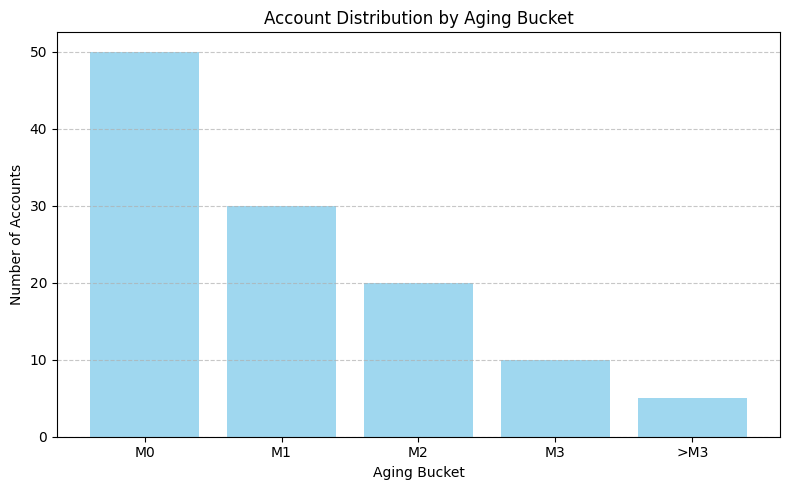

In [20]:
import matplotlib.pyplot as plt

# Sample agg4 DataFrame (replace this with your actual data)
agg4 = {
    'AgingBucket': ['M0', 'M1', 'M2', 'M3', '>M3'],
    'AccountCount': [50, 30, 20, 10, 5],
}
agg4_df = pd.DataFrame(agg4)

# Bar chart for AccountCount
plt.figure(figsize=(8, 5))
plt.bar(agg4_df['AgingBucket'], agg4_df['AccountCount'], color='skyblue', alpha=0.8)
plt.title('Account Distribution by Aging Bucket')
plt.xlabel('Aging Bucket')
plt.ylabel('Number of Accounts')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()